## Test of the various classes including

- smooth.py
- model.py
- bspline.py
- penalty_matrix.py


In [ ]:
# tests for smooth.py

from smooth import Smooths
from smooth import TensorProductSmooths as TPS

def test__TensorProductSmooths():
    import pandas as pd
    import numpy as np
    X = pd.DataFrame(data={"x1": np.logspace(0.001,0.99,1000), #, 
                           "x2": np.linspace(0,1,1000), #}) #,
                           "x3": np.linspace(-2,2,1000), })

    TP = TPS(x_data=X[["x1", "x2"]].values, n_param=(10,10), penalty="smooth",
            lam_s=1)
    
def test__Smooths():
    import pandas as pd
    import numpy as np
    X = pd.DataFrame(data={"x1": np.logspace(0.001,0.99,1000), #, 
                           "x2": np.linspace(0,1,1000), #}) #,
                           "x3": np.linspace(-2,2,1000), })

    S = Smooths(x_data=X[["x1"]].values.ravel(), n_param=10, penalty="smooth",
                y_peak_or_valley=None, lam_c=None, lam_s=None)
    

In [ ]:
test__Smooths()

test__TensorProductSmooths()

In [ ]:
# test for star_model.py
from star_model import StarModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


def test_StarModel():
    np.random.seed(42)
    print("Create an object of StarModel!")
    print("Test StarModel.fit(X,y) \n")
    
    # create some data
    X = pd.DataFrame(data={"x1": np.linspace(-2,2,1000), 
                           "x2": np.linspace(0,1,1000), }) #,
    y = pd.DataFrame(data={"y": -2*np.exp(-X["x1"]**2) + 0.1*np.exp(X["x2"]) + 
                           0.1*np.random.randn(len(X["x1"])) + X["x1"] * X["x2"]  })

    X_norm = MinMaxScaler().fit_transform(X)
    y_norm = MinMaxScaler().fit_transform(y)

    # create a model descrition
    m = ( ('s(1)', 'valley', 25, (1, 1000)),  
          ('s(2)', 'smooth', 25, (1, 1000)), )

    # create the model
    Model = StarModel(descr=m)
    # fit the model
    
    Model.fit(X=X_norm, y=y_norm)
    return Model

In [ ]:
M = test_StarModel()

In [30]:
# test bspline.py
from bspline import B_spline
import numpy as np

def test__B_spline():
    
    print("Test B_spline with linspace data!\n")
    x = np.linspace(-1,1,25)
    B1 = B_spline(x=x)
    B1.b_spline_basis(k=10)
    B1.plot_basis()
    
    print("Test B_spline with random data!\n")
    xr = np.random.random(25)
    xr.sort()
    B2 = B_spline(x=xr)
    B2.b_spline_basis(k=10)
    B2.plot_basis()
    
    print("Test B_spline with logspace data!\n")
    xl = np.logspace(5,1,25)
    B3 = B_spline(x=xl)
    B3.b_spline_basis(k=10)
    B3.plot_basis()
    
    return

Test B_spline with linspace data!

'x' from initialization is used for the spline basis!


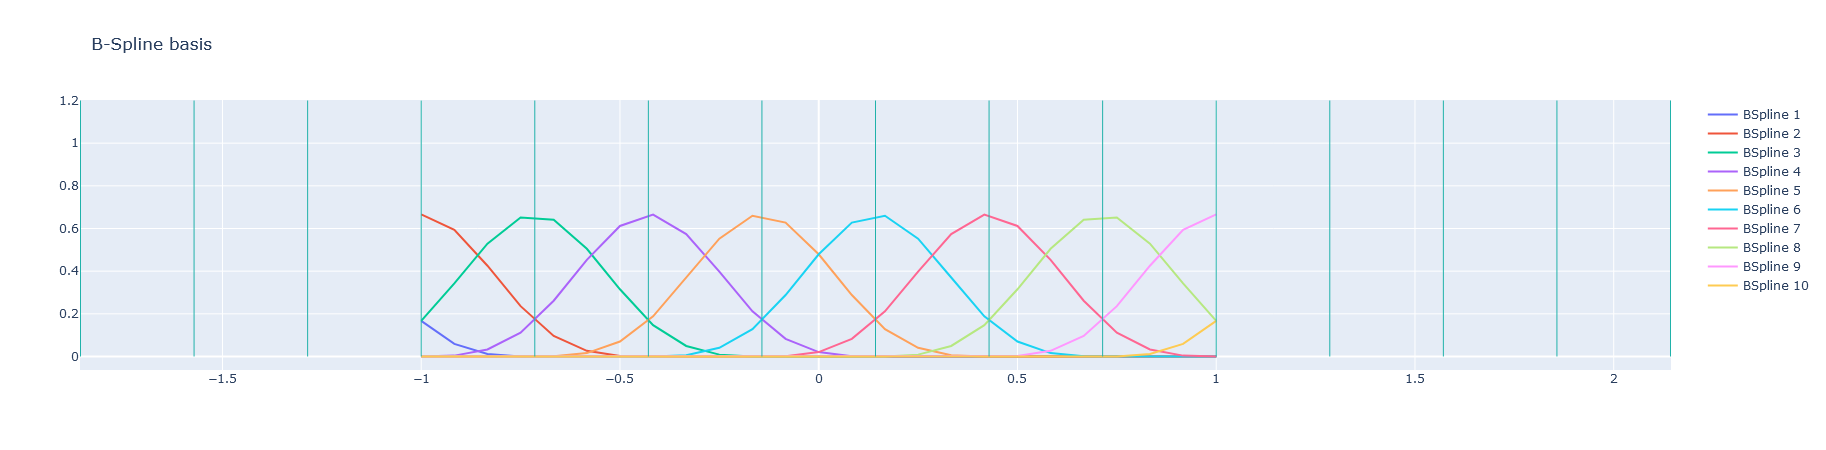

Test B_spline with random data!

'x' from initialization is used for the spline basis!


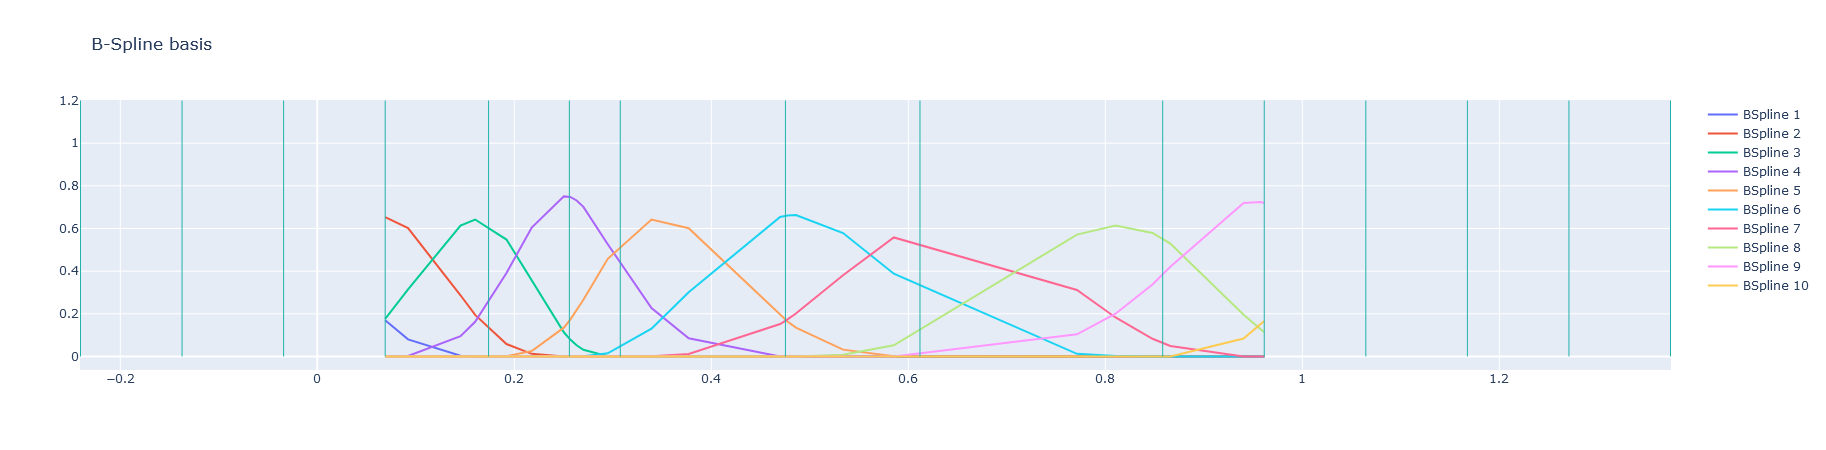

Test B_spline with logspace data!

'x' from initialization is used for the spline basis!


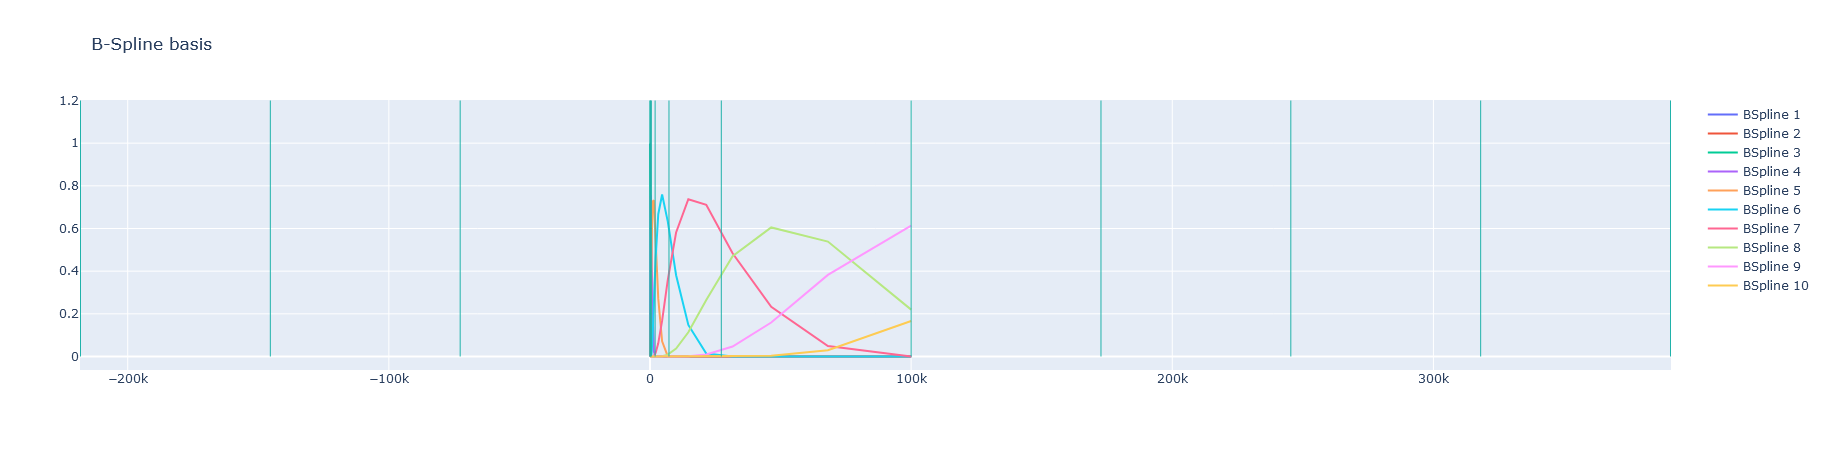

In [31]:
test__B_spline()

In [1]:
from penalty_matrix import PenaltyMatrix
from smooth import Smooths
import numpy as np

def test():

    # generate data
    np.random.seed(42)
    x = np.linspace(-3,3,1000)
    y = np.exp(x**2) + 0.1*np.random.randn(len(x))
    s = Smooths(x_data=x, n_param=20, penalty="valley", y_peak_or_valley=y)

    # test Penalty_matrix
    P = PenaltyMatrix()
    print("D1 Difference matrix shape: ", P.D1_difference_matrix(n_param=10).shape)
    print("D2 Difference matrix shape: ", P.D2_difference_matrix(n_param=10).shape)
    print("Smoothness matrix shape: ", P.Smoothness_matrix(n_param=10).shape)
    print("Peak matrix shape: ", P.Peak_matrix(n_param=10, y_data=y, basis=s.basis).shape)
    print("Valley matrix shape: \n", P.Valley_matrix(n_param=10, y_data=-y, basis=s.basis))


In [2]:
test()

Use 'x_basis' for the spline basis!
D1 Difference matrix shape:  (9, 10)
D2 Difference matrix shape:  (8, 10)
Smoothness matrix shape:  (8, 10)
Peak matrix shape:  (8, 10)
Valley matrix shape: 
 [[ 1 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 -1  1  0  0]
 [ 0  0  0  0  0  0  0 -1  1  0]
 [ 0  0  0  0  0  0  0  0 -1  1]]
